In [2]:
import pandas as pd
import io
import os
import matplotlib.pyplot as plt

In [36]:
all_genes = []
all_gene_titles = []

# рандомные гены из truseq:
ube2j2 = ["chr1", 1253912, 1273854]
gemin5 = ["chr5", 154887411, 154938211]
atp2a3 = ["chr17", 3923870, 3964464]

genes_truseq = [ube2j2, gemin5, atp2a3]
all_genes.append(genes_truseq)
gene_titles_truseq = ["UBE2J2", "GEMIN5", "ATP2A3"]
all_gene_titles.append(gene_titles_truseq)

# рандомные гены из xgene:
cpne9 = ["chr3", 9703996, 9729692]
shprh = ["chr6", 145886427, 145955322]
rab31 = ["chr18", 9708405, 9859325]

genes_xgen = [cpne9, shprh, rab31]
all_genes.append(genes_xgen)
gene_titles_xgen = ["CPNE9", "SHPRH", "RAB31"]
all_gene_titles.append(gene_titles_xgen)

panel_names = ["truseq", "xgen"]
panel_folders = ["bedcoverage_truseq" ,"bedcoverage_xgen"]

# Чтение списка названий образцов из файла:
with open('./Data/truseq') as f:
    names_of_samples_truseq = f.read().splitlines()
with open('./Data/xgen') as f:
    names_of_samples_xgen = f.read().splitlines()
all_names_of_samples = [names_of_samples_truseq, names_of_samples_xgen]


In [9]:
# сформируем bed-файлы регионов по пересечению с панелью truseq:
bed_regions = pd.read_table("./Data/truseq_dna_exome_targeted_regions_manifest_v1_2_lift_0_95_hg38.bed", delimiter="\t", header = None)
bed_regions.columns = ["#chr", "start", "end", "extra"]

for i in range(0, len(genes_truseq)):
    gene = genes_truseq[i]
    gene_title = gene_titles_truseq[i]

    bed_regions_of_gene = bed_regions.loc[bed_regions['#chr'] == gene[0]]
    bed_regions_of_gene = bed_regions_of_gene.loc[bed_regions_of_gene["start"] >= gene[1]]
    bed_regions_of_gene = bed_regions_of_gene.loc[bed_regions_of_gene["end"] <= gene[2]]
    
    bed_regions_of_gene.to_csv("./Data/exon_data_files/"+str(gene_title), sep = "\t", columns=["#chr", "start", "end"], header = False, index = False)

# сформируем bed-файлы регионов по пересечению с панелью xgen:
bed_regions = pd.read_table("./Data/xgen-exome-research-panel-v2-targets-hg38.bed", delimiter="\t", header = None)
bed_regions.columns = ["#chr", "start", "end", "gene", "0", "+-"]

for i in range(0, len(genes_xgen)):
    gene = genes_xgen[i]
    gene_title = gene_titles_xgen[i]

    bed_regions_of_gene = bed_regions.loc[bed_regions['#chr'] == gene[0]]
    bed_regions_of_gene = bed_regions_of_gene.loc[bed_regions_of_gene["start"] >= gene[1]]
    bed_regions_of_gene = bed_regions_of_gene.loc[bed_regions_of_gene["end"] <= gene[2]]
    
    bed_regions_of_gene.to_csv("./Data/exon_data_files/"+str(gene_title), sep = "\t", columns=["#chr", "start", "end"], header = False, index = False)

# Надо понимать, что сформированные файлы имеют слегка отличающийся формат.


     #chr    start      end                     extra
167  chr1  1255200  1255489  CEX-chr1-1190581-1190869
168  chr1  1256035  1256135  CEX-chr1-1191416-1191515
169  chr1  1256989  1257132  CEX-chr1-1192370-1192512
170  chr1  1257205  1257312  CEX-chr1-1192586-1192692
171  chr1  1262262  1262390  CEX-chr1-1197643-1197770
172  chr1  1263316  1263416  CEX-chr1-1198697-1198796
173  chr1  1264756  1264856  CEX-chr1-1200137-1200236
174  chr1  1266060  1266160  CEX-chr1-1201441-1201540
175  chr1  1267859  1267994  CEX-chr1-1203240-1203374
       #chr      start        end                         extra
66404  chr5  154888187  154888379  CEX-chr5-154267748-154267939
66405  chr5  154889318  154889419  CEX-chr5-154268879-154268979
66406  chr5  154891238  154891744  CEX-chr5-154270799-154271304
66407  chr5  154892384  154892551  CEX-chr5-154271945-154272111
66408  chr5  154896079  154896349  CEX-chr5-154275640-154275909
66409  chr5  154898437  154898652  CEX-chr5-154277998-154278212
66410  chr5 

In [34]:
# для ручного прогона, первое число -- номер панели, второе -- номер гена
gene_title = all_gene_titles[1][2]  
gene = all_genes[1][2]
panel_folder = panel_folders[1]

In [25]:
# скрипт загрузки всех данных по образцам bedcov
def load_bedcov(panel_folder, gene_title):
    # Подгрузим образцы
    file_path = "./Data/" + panel_folder + "/" + gene_title + "/"
    files = os.listdir(file_path)

    # Датасет куда загружены все образцы, монстр
    df = []
    for i in files:
        df_i = pd.read_table(file_path + i, delimiter="\t", header = None)
        df_i.columns = ["chr", "start_gene", "end_gene", "nucleotide", str(i)]
        df.append(df_i)

    # Проверка совместимости датасетов
    for i in range(0,len(df)):
        if (df[i].loc[:, ["chr", "start_gene", "end_gene", "nucleotide"]].equals(df[0].loc[:, ["chr", "start_gene", "end_gene", "nucleotide"]])) == False:
            print("Загруженные регионы bedcoverage не совпадают между образцов")

    # Совместим и перепишем в df
    for i in range(0,len(df)):
        df[0] = pd.merge(df[0], df[i], how = 'left')
    df = df[0]

    print("panel:", panel_folder, "gene", gene_title, "coverage data loaded")
    return df


panel: bedcoverage_xgen gene RAB31 coverage data loaded


,chr,start_gene,end_gene,nucleotide,RAB31.15623.bqsr.bam.bedcoverage,RAB31.15624.bqsr.bam.bedcoverage,RAB31.15625.bqsr.bam.bedcoverage,RAB31.15626.bqsr.bam.bedcoverage,RAB31.15627.bqsr.bam.bedcoverage,RAB31.15628.bqsr.bam.bedcoverage,RAB31.15629.bqsr.bam.bedcoverage,RAB31.15667.bqsr.bam.bedcoverage,RAB31.16639.bqsr.bam.bedcoverage
0,chr18,9708405,9708444,1,55,52,65,61,83,89,88,27,149
1,chr18,9708405,9708444,2,55,52,64,61,83,88,89,27,151
2,chr18,9708405,9708444,3,56,54,65,60,84,91,91,28,152
3,chr18,9708405,9708444,4,54,55,66,60,84,92,91,28,152
4,chr18,9708405,9708444,5,55,55,66,60,84,92,91,28,152
...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,chr18,9859227,9859325,94,45,32,42,59,57,52,47,44,70
584,chr18,9859227,9859325,95,45,32,42,59,56,52,47,42,70
585,chr18,9859227,9859325,96,46,32,42,59,57,53,47,41,71
586,chr18,9859227,9859325,97,47,32,42,59,57,53,46,41,71


In [26]:
# скрипт, по номеру позиции в геноме возвращающий позцию в экзоме
def get_exom_num(genome_num, df_exons_for_get_num_script):
    exome_num = 0
    for index, row in df_exons_for_get_num_script.iterrows():
        if (genome_num > row["end"]):
            exome_num += row["end"] -row["start"] + 1
            #print("add",  row["exon_num"],"exon len", row["exon_len"])
            continue
        else:
            if (genome_num < row["start"]):
                exome_num = -1  # если не попадает ни в один экзон, возвращаем -1
                #print("don't fit", genome_num, "<", row["start"], "start of ", row["exon_num"], "exone")
            else:
                #print("fit in", row["exon_num"], "exon, so add", genome_num - row["start"], "to a current start position", exome_num)
                exome_num = exome_num + 1 + genome_num - row["start"]
            break
    # может ещё вылететь за пределы гена, это исключение не обрабатывается
    return exome_num

In [53]:
# скрипт загрузки данных samtools
def load_samtools_data(panel_name):
    file_path = "./Data/samtools_" + panel_name + "/"
    files = os.listdir(file_path)
    name_of_samples = []
    for i in files:
        name_of_samples.append(i.split(".")[0])

    df_total_reads = pd.DataFrame(columns = ["sample", "number of mapped reads"])
    df_total_reads["sample"] = name_of_samples
    df_total_reads = df_total_reads.set_index('sample')
    number_of_mapped_reads = []
    
    for i in files:
        with open(file_path + i) as f:
            j = f.read()[:-2]   # убираем перенос строки
        number_of_mapped_reads.append(j)
    df_total_reads["number of mapped reads"] = number_of_mapped_reads

    print("samtools data for samples made on", panel_name, "panel loaded")
    print("names of samples ", name_of_samples)
    return df_total_reads

In [58]:
# функция, в которой от датафрейма убирается все куски вне экзонов и каждой строчке приписывается номер экзона
def df_exon_filter(df, df_exons):
    df_for_return = df.copy()

    # Добавим колонку с номером экзона для удобства
    exon_data = pd.Series(data=[]*df_for_return.shape[0], dtype=int)
    df_for_return['exon_data'] = exon_data

    # кусок кода, который оставляет от таблицы только экзоны из панели (и для образцов и для контролей)
    df_new = pd.DataFrame()
    for index, row in df_exons.iterrows():
        # для каждого экзона найдём его строки, в образцах и контроле
        df_this_exon = df_for_return[df_for_return[["start_gene", "nucleotide"]].sum(axis=1) >= row["start"]]
        df_this_exon = df_this_exon[df_this_exon[["start_gene", "nucleotide"]].sum(axis=1) <= row["end"]]
        df_this_exon['exon_data'] = index + 1

        # и склеим их в один датасет
        df_new = pd.concat([df_new, df_this_exon], sort=False)
    # и делает сквозную нумерацию по экзонам
    df_for_return = df_new.reset_index(drop=True)

    # удалим нафиг колонки с началом и концом гена
    df_for_return = df_for_return.drop("start_gene", 1)
    df_for_return = df_for_return.drop("end_gene", 1)
        
    return df_for_return

In [42]:
# скрипт чтение vcf
def read_vcf(path):
    with open(path, 'r') as f:
        lines = [l for l in f if not l.startswith('##')]
    return pd.read_csv(
        io.StringIO(''.join(lines)),
        dtype={'#CHROM': str, 'POS': int, 'ID': str, 'REF': str, 'ALT': str,
               'QUAL': str, 'FILTER': str, 'INFO': str},
        sep='\t'
    ).rename(columns={'#CHROM': 'CHROM'})

<>:106: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:106: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\Alex\AppData\Local\Temp/ipykernel_20692/3886221529.py:106: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  founds2 = list(filter(lambda x: x is not -1, founds2)) # уберём все находки, что попали между экзонами


samtools data for samples made on truseq panel loaded
names of samples  ['15668', '16128', '16154', '16155']
samtools data for samples made on truseq_controls panel loaded
names of samples  ['16459', '16554', '16568', '16577', '16609', '16610', '16611', '16616', '7635', '7871', '8356', '8357']
panel: bedcoverage_truseq gene UBE2J2 coverage data loaded
panel: bedcoverage_truseq_controls gene UBE2J2 coverage data loaded


C:\Users\Alex\AppData\Local\Temp/ipykernel_20692/1077655237.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_for_return = df_for_return.drop("start_gene", 1)
C:\Users\Alex\AppData\Local\Temp/ipykernel_20692/1077655237.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_for_return = df_for_return.drop("end_gene", 1)


list of samples ['UBE2J2.15668.bqsr.bam.bedcoverage', 'UBE2J2.16128.bqsr.bam.bedcoverage', 'UBE2J2.16154.bqsr.bam.bedcoverage', 'UBE2J2.16155.bqsr.bam.bedcoverage']
list of samples controls ['UBE2J2.16459.bam.bedcoverage', 'UBE2J2.16554.bam.bedcoverage', 'UBE2J2.16568.bam.bedcoverage', 'UBE2J2.16577.bam.bedcoverage', 'UBE2J2.16609.bam.bedcoverage', 'UBE2J2.16610.bam.bedcoverage', 'UBE2J2.16611.bam.bedcoverage', 'UBE2J2.16616.bam.bedcoverage', 'UBE2J2.7635.bam.bedcoverage', 'UBE2J2.7871.bam.bedcoverage', 'UBE2J2.8356.bam.bedcoverage', 'UBE2J2.8357.bam.bedcoverage']


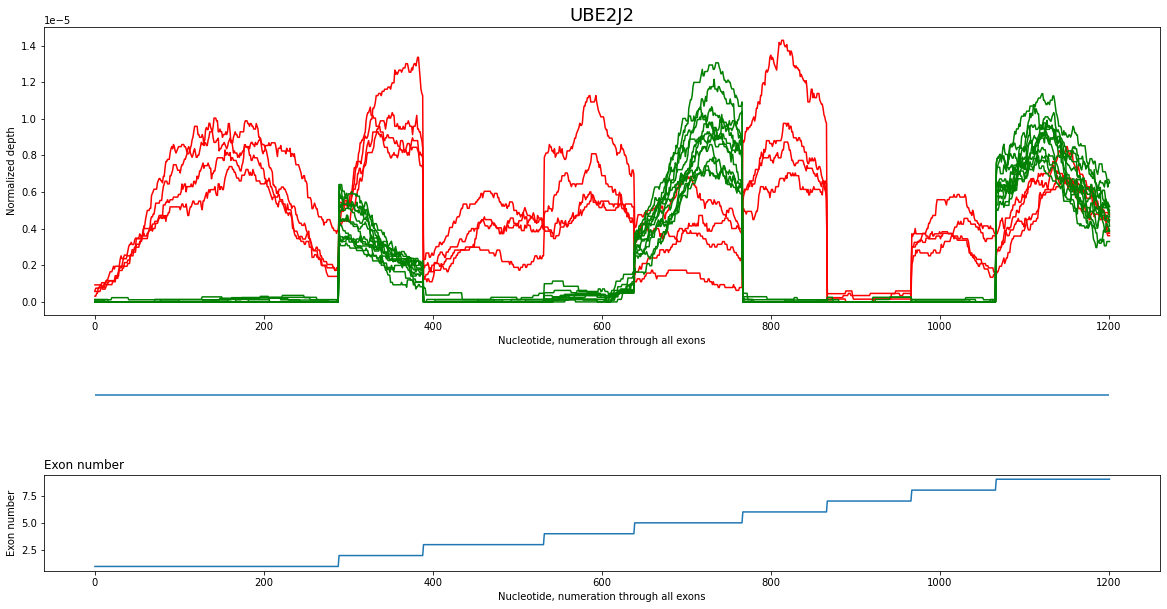

panel: bedcoverage_truseq gene GEMIN5 coverage data loaded
panel: bedcoverage_truseq_controls gene GEMIN5 coverage data loaded
list of samples ['GEMIN5.15668.bqsr.bam.bedcoverage', 'GEMIN5.16128.bqsr.bam.bedcoverage', 'GEMIN5.16154.bqsr.bam.bedcoverage', 'GEMIN5.16155.bqsr.bam.bedcoverage']


C:\Users\Alex\AppData\Local\Temp/ipykernel_20692/1077655237.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_for_return = df_for_return.drop("start_gene", 1)
C:\Users\Alex\AppData\Local\Temp/ipykernel_20692/1077655237.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_for_return = df_for_return.drop("end_gene", 1)


list of samples controls ['GEMIN5.16459.bam.bedcoverage', 'GEMIN5.16554.bam.bedcoverage', 'GEMIN5.16568.bam.bedcoverage', 'GEMIN5.16577.bam.bedcoverage', 'GEMIN5.16609.bam.bedcoverage', 'GEMIN5.16610.bam.bedcoverage', 'GEMIN5.16611.bam.bedcoverage', 'GEMIN5.16616.bam.bedcoverage', 'GEMIN5.7635.bam.bedcoverage', 'GEMIN5.7871.bam.bedcoverage', 'GEMIN5.8356.bam.bedcoverage', 'GEMIN5.8357.bam.bedcoverage']


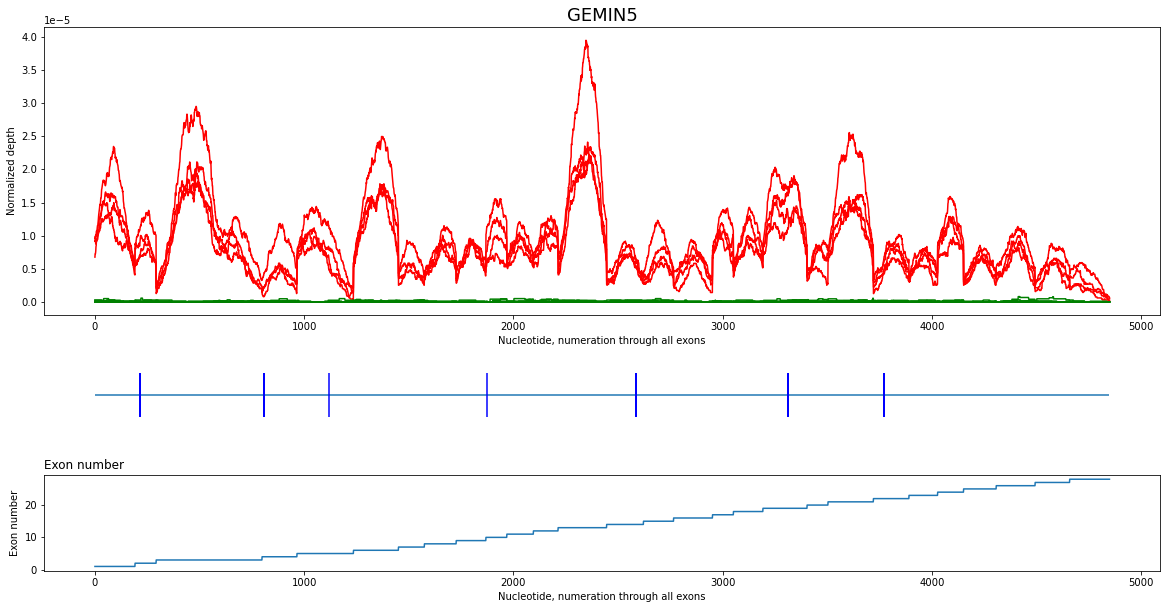

panel: bedcoverage_truseq gene ATP2A3 coverage data loaded
panel: bedcoverage_truseq_controls gene ATP2A3 coverage data loaded
list of samples ['ATP2A3.15668.bqsr.bam.bedcoverage', 'ATP2A3.16128.bqsr.bam.bedcoverage', 'ATP2A3.16154.bqsr.bam.bedcoverage', 'ATP2A3.16155.bqsr.bam.bedcoverage']


C:\Users\Alex\AppData\Local\Temp/ipykernel_20692/1077655237.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_for_return = df_for_return.drop("start_gene", 1)
C:\Users\Alex\AppData\Local\Temp/ipykernel_20692/1077655237.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_for_return = df_for_return.drop("end_gene", 1)


list of samples controls ['ATP2A3.16459.bam.bedcoverage', 'ATP2A3.16554.bam.bedcoverage', 'ATP2A3.16568.bam.bedcoverage', 'ATP2A3.16577.bam.bedcoverage', 'ATP2A3.16609.bam.bedcoverage', 'ATP2A3.16610.bam.bedcoverage', 'ATP2A3.16611.bam.bedcoverage', 'ATP2A3.16616.bam.bedcoverage', 'ATP2A3.7635.bam.bedcoverage', 'ATP2A3.7871.bam.bedcoverage', 'ATP2A3.8356.bam.bedcoverage', 'ATP2A3.8357.bam.bedcoverage']


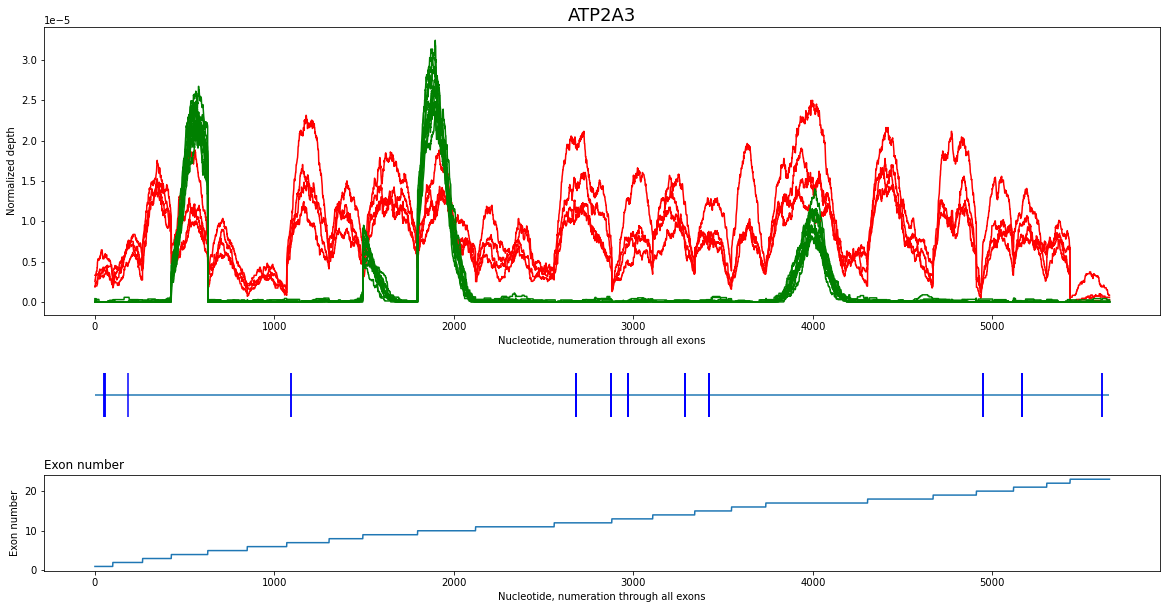

samtools data for samples made on xgen panel loaded
names of samples  ['15623', '15624', '15625', '15626', '15627', '15628', '15629', '15667', '16639']
samtools data for samples made on xgen_controls panel loaded
names of samples  ['16617', '16624', '16627', '16628', '16640', '16646', '16664', '16680', '16684', '16685', '16687']
panel: bedcoverage_xgen gene CPNE9 coverage data loaded
panel: bedcoverage_xgen_controls gene CPNE9 coverage data loaded
list of samples ['CPNE9.15623.bqsr.bam.bedcoverage', 'CPNE9.15624.bqsr.bam.bedcoverage', 'CPNE9.15625.bqsr.bam.bedcoverage', 'CPNE9.15626.bqsr.bam.bedcoverage', 'CPNE9.15627.bqsr.bam.bedcoverage', 'CPNE9.15628.bqsr.bam.bedcoverage', 'CPNE9.15629.bqsr.bam.bedcoverage', 'CPNE9.15667.bqsr.bam.bedcoverage', 'CPNE9.16639.bqsr.bam.bedcoverage']


C:\Users\Alex\AppData\Local\Temp/ipykernel_20692/1077655237.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_for_return = df_for_return.drop("start_gene", 1)
C:\Users\Alex\AppData\Local\Temp/ipykernel_20692/1077655237.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_for_return = df_for_return.drop("end_gene", 1)


list of samples controls ['CPNE9.16617.bam.bedcoverage', 'CPNE9.16624.bam.bedcoverage', 'CPNE9.16627.bam.bedcoverage', 'CPNE9.16628.bam.bedcoverage', 'CPNE9.16640.bam.bedcoverage', 'CPNE9.16646.bam.bedcoverage', 'CPNE9.16664.bam.bedcoverage', 'CPNE9.16680.bam.bedcoverage', 'CPNE9.16684.bam.bedcoverage', 'CPNE9.16685.bam.bedcoverage', 'CPNE9.16687.bam.bedcoverage']


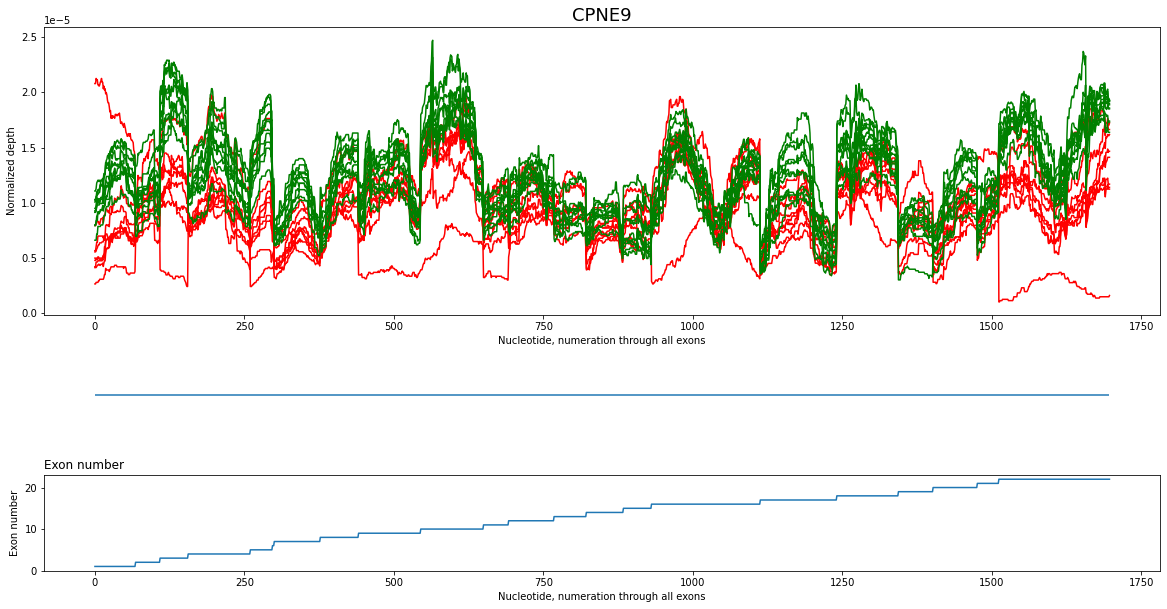

panel: bedcoverage_xgen gene SHPRH coverage data loaded
panel: bedcoverage_xgen_controls gene SHPRH coverage data loaded
list of samples ['SHPRH.15623.bqsr.bam.bedcoverage', 'SHPRH.15624.bqsr.bam.bedcoverage', 'SHPRH.15625.bqsr.bam.bedcoverage', 'SHPRH.15626.bqsr.bam.bedcoverage', 'SHPRH.15627.bqsr.bam.bedcoverage', 'SHPRH.15628.bqsr.bam.bedcoverage', 'SHPRH.15629.bqsr.bam.bedcoverage', 'SHPRH.15667.bqsr.bam.bedcoverage', 'SHPRH.16639.bqsr.bam.bedcoverage']


C:\Users\Alex\AppData\Local\Temp/ipykernel_20692/1077655237.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_for_return = df_for_return.drop("start_gene", 1)
C:\Users\Alex\AppData\Local\Temp/ipykernel_20692/1077655237.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_for_return = df_for_return.drop("end_gene", 1)


list of samples controls ['SHPRH.16617.bam.bedcoverage', 'SHPRH.16624.bam.bedcoverage', 'SHPRH.16627.bam.bedcoverage', 'SHPRH.16628.bam.bedcoverage', 'SHPRH.16640.bam.bedcoverage', 'SHPRH.16646.bam.bedcoverage', 'SHPRH.16664.bam.bedcoverage', 'SHPRH.16680.bam.bedcoverage', 'SHPRH.16684.bam.bedcoverage', 'SHPRH.16685.bam.bedcoverage', 'SHPRH.16687.bam.bedcoverage']


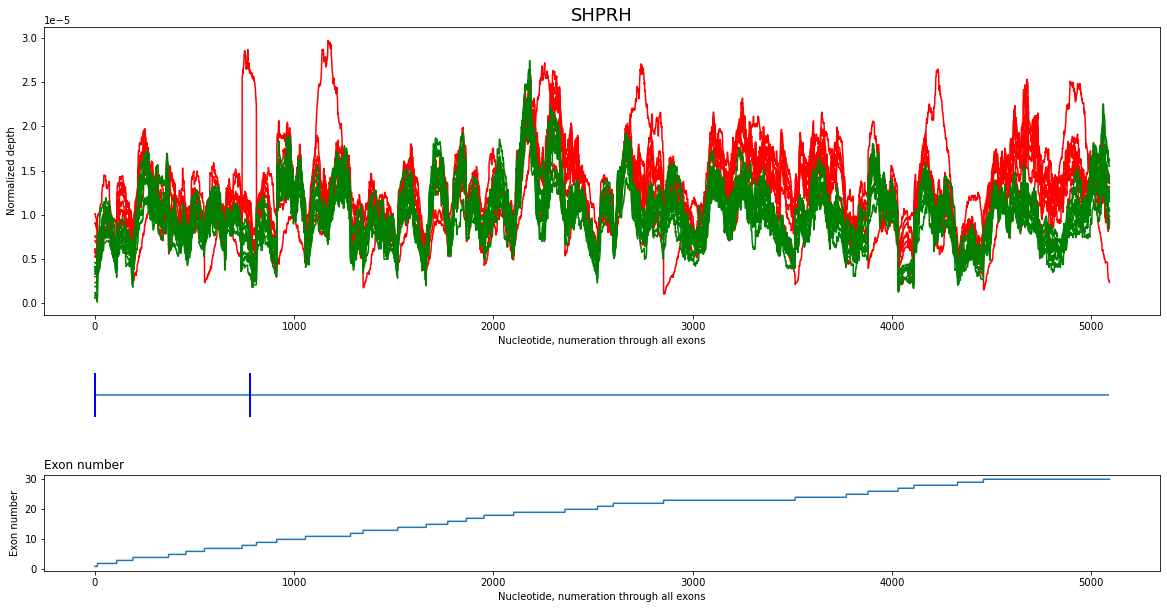

panel: bedcoverage_xgen gene RAB31 coverage data loaded
panel: bedcoverage_xgen_controls gene RAB31 coverage data loaded
list of samples ['RAB31.15623.bqsr.bam.bedcoverage', 'RAB31.15624.bqsr.bam.bedcoverage', 'RAB31.15625.bqsr.bam.bedcoverage', 'RAB31.15626.bqsr.bam.bedcoverage', 'RAB31.15627.bqsr.bam.bedcoverage', 'RAB31.15628.bqsr.bam.bedcoverage', 'RAB31.15629.bqsr.bam.bedcoverage', 'RAB31.15667.bqsr.bam.bedcoverage', 'RAB31.16639.bqsr.bam.bedcoverage']


C:\Users\Alex\AppData\Local\Temp/ipykernel_20692/1077655237.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_for_return = df_for_return.drop("start_gene", 1)
C:\Users\Alex\AppData\Local\Temp/ipykernel_20692/1077655237.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_for_return = df_for_return.drop("end_gene", 1)


list of samples controls ['RAB31.16617.bam.bedcoverage', 'RAB31.16624.bam.bedcoverage', 'RAB31.16627.bam.bedcoverage', 'RAB31.16628.bam.bedcoverage', 'RAB31.16640.bam.bedcoverage', 'RAB31.16646.bam.bedcoverage', 'RAB31.16664.bam.bedcoverage', 'RAB31.16680.bam.bedcoverage', 'RAB31.16684.bam.bedcoverage', 'RAB31.16685.bam.bedcoverage', 'RAB31.16687.bam.bedcoverage']


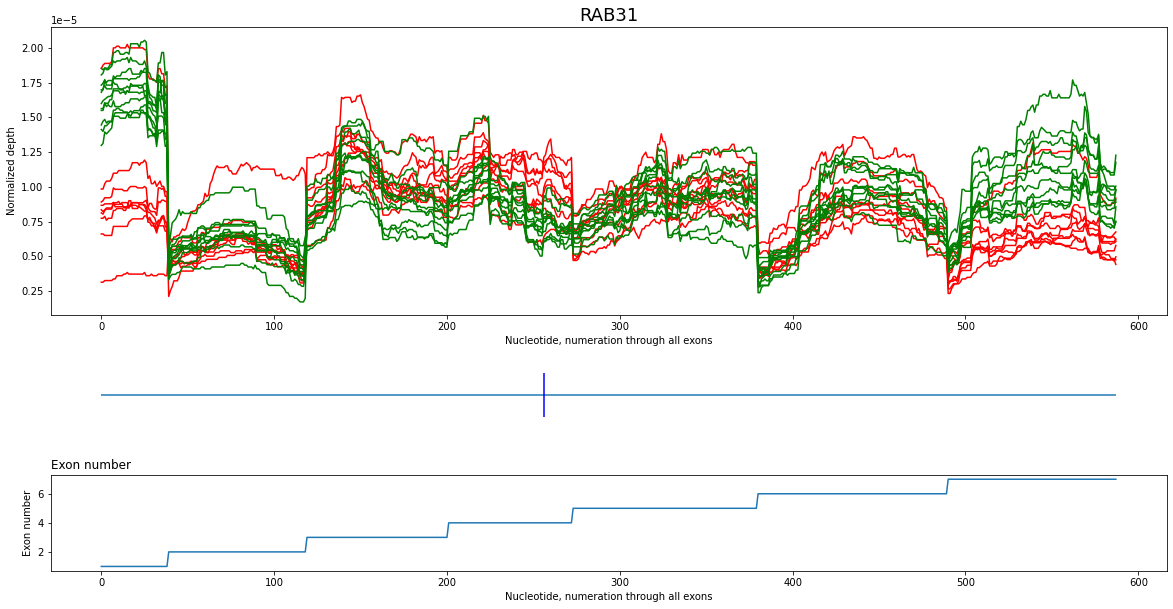

In [71]:
# А теперь гигантский цикл, чтобы не прогонять панели и гены вручную 
for i in range(0, 2):   # счётчик панели
    genes = all_genes[i]
    gene_titles = all_gene_titles[i]
    panel_folder = panel_folders[i]
    name_of_samples = all_names_of_samples[i]
    panel_name = panel_names[i]

    # загрузка данных samtools
    df_total_reads = load_samtools_data(panel_name)
    df_total_reads_control = load_samtools_data(panel_name + "_controls")

    # загрузка датасета cnv-находок
    df_cnv = pd.read_table("./Data/" + panel_name + "_cnv_with_controls.tsv", delimiter="\t")

    for j in range(0, len(genes)):     # счётчик по генам
        gene = genes[j]
        gene_title = gene_titles[j]
        
        # загрузка данных bedcoverage
        df  = load_bedcov(panel_folder, gene_title)
        df_control = load_bedcov(panel_folder + "_controls", gene_title)

        # загрузим данные по экзонам в данном гене
        df_exons = pd.read_table("./Data/exon_data_files/" + gene_title, delimiter="\t", header = None).reset_index(drop=True)
        df_exons.columns = ["#chr", "start", "end"]
        df_exons_for_get_num_script = df_exons

        df = df_exon_filter(df, df_exons)
        df_control = df_exon_filter(df_control, df_exons)

        # Сделаем список полных названий ключевых файлов, для сбора данных, не забудем удалить все добавленные колонки
        samples = df.columns.values.tolist()
        samples.remove("chr")
        samples.remove("nucleotide")
        samples.remove("exon_data")
        print("list of samples", samples)  

        # Работа с CNV
        # обрежем и оставим лишь те находки, что вошли в наш ген
        cnv_in_gene = df_cnv[df_cnv['#chr'] == gene[0]]
        cnv_in_gene = cnv_in_gene[cnv_in_gene["start"] > gene[1]]
        cnv_in_gene = cnv_in_gene[cnv_in_gene["end"] < gene[2]]
        # И сделаем колонку со сквозной нумерацией по экзонам, для графика.
        data = []
        for index, row in cnv_in_gene.iterrows():
            data.append(get_exom_num(row["start"], df_exons_for_get_num_script))
        cnv_in_gene['exon_numeration'] = data 

        # Работа с VCF-данными
        # загрузка датасета точечных мутаций
        all_samples_mutations_found_in_gene = pd.DataFrame()
        # Склеим данные разных образцов, но сначала обрежем под ген, чтобы не перегрузить
        for i in samples:
            this_sample_mutations_in_gene = read_vcf("./Data/samples-vcf/" + i[(len(gene_title)+1):(len(gene_title)+6)] + ".vcf")
            this_sample_mutations_in_gene = this_sample_mutations_in_gene[this_sample_mutations_in_gene["CHROM"] == gene[0]]
            this_sample_mutations_in_gene = this_sample_mutations_in_gene[this_sample_mutations_in_gene["POS"] >= gene [1]]
            this_sample_mutations_in_gene = this_sample_mutations_in_gene[this_sample_mutations_in_gene["POS"] <= gene[2]]
            all_samples_mutations_found_in_gene = pd.concat([this_sample_mutations_in_gene, all_samples_mutations_found_in_gene], sort=False)
        # И сделаем колонку со сквозной нумерацией по экзонам, для графика.
        data = []
        for index, row in all_samples_mutations_found_in_gene.iterrows():
            data.append(get_exom_num(row["POS"], df_exons_for_get_num_script))
        all_samples_mutations_found_in_gene['exon_numeration'] = data
        # Обрежем под те экзоны, что у нас есть -- нет

        # Непосредственно построение графика
        selected_colors = ["#7DC3DD","#DE9B3E","#E8ADC5","#CFBC73","#609C71","#DDE6E0","#838191","#E3E347","#B9E276","#DF8DDA", "#B9A4E4","#DB657C","#E2604E","#5E54DA","#867BDB","#72A3DF","#882DE3","#86EA52","#D2C3DE", "#AC5CDC","#D0967C","#D9C7AD","#E278E8","#71E4CA", "#6FE394","#8E5485","#C5E8B4","#96E4E3"]

        fig, (ax1, ax2, ax3) = plt.subplots(ncols=1, nrows=3, sharey='row', figsize = (20, 10), gridspec_kw={'height_ratios': [3, 1, 1]})

        c_n = 0
        for i in samples:
            c = selected_colors[c_n]        # смена цвета
            c_n += 1

            #int(df_total_reads.at[i.split(".")[1], "number of mapped reads"]) --  число замапленых ридов для этого образца 
            ax1.plot(df.index.tolist(), df[str(i)]/int(df_total_reads.at[i.split(".")[1], "number of mapped reads"]),   #ax.plot = lines или ax.scatter
            label = "sample " + str(i),
            color = "r")    # color = c  если хотим красивую сменяемость цветов
        
        # Загрузим список образцов в контроле
        samples_control = df_control.columns.values.tolist()
        samples_control.remove("chr")
        samples_control.remove("nucleotide")
        samples_control.remove("exon_data")
        print("list of samples controls", samples_control)  

        for i in samples_control:
            ax1.plot(df_control.index.tolist(), df_control[str(i)]/int(df_total_reads_control.at[i.split(".")[1], "number of mapped reads"]),   #ax.plot = lines или ax.scatter
            label = "sample " + str(i),
            color = "g")
            

        ax1.set_title(gene_title, fontsize=18)
        ax1.set_ylabel('Normalized depth')
        ax1.set_xlabel("Nucleotide, numeration through all exons")

        ax3.plot(df.index.tolist(), df["exon_data"])
        ax3.set_title('Exon number', loc = "left")
        ax3.set_ylabel('Exon number')
        ax3.set_xlabel("Nucleotide, numeration through all exons")

        founds = cnv_in_gene['exon_numeration'].to_list()
        founds2 = all_samples_mutations_found_in_gene['exon_numeration'].to_list()
        founds2 = list(filter(lambda x: x is not -1, founds2)) # уберём все находки, что попали между экзонами
        ax2.hlines(1,1, len(df.index.tolist()))  # Draw a horizontal line
        ax2.eventplot(founds, orientation='horizontal', colors='g') # зелёным отмечаем cnv
        ax2.eventplot(founds2, orientation='horizontal', colors='b') # синим точечным мутации
        ax2.axis('off')
        ax2.set_xlabel("CNV founds")

        plt.savefig("./Results/Truseq ang xgen with controls/coverage of " + gene_title +" gene" + ".png", dpi = 400)
        plt.show()
